In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
from lmfit import models
import math

In [449]:
df = pd.read_csv('Our_Data_Doppler_Broadened\F0001CH2.CSV', header=None, usecols=[3,4])

df

,3,4
0,0.02840,9.52
1,0.02844,9.52
2,0.02848,9.52
3,0.02852,9.52
4,0.02856,9.52
...,...,...
2495,0.12820,4.56
2496,0.12824,4.56
2497,0.12828,4.56
2498,0.12832,4.56


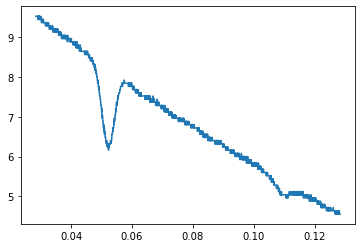

In [450]:
plt.plot(df[3], df[4])

In [451]:
# Fit functions

def LinFunc(x, a, b):
    y = a*x+b
    return y

Lin_model = models.Model(LinFunc)
gauss_model_1 = models.GaussianModel(prefix="A_")
gauss_model_2 = models.GaussianModel(prefix="B_")

tot_model = Lin_model + gauss_model_1 + gauss_model_2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')

parameter names: ['a', 'b', 'A_amplitude', 'A_center', 'A_sigma', 'B_amplitude', 'B_center', 'B_sigma']
independent variables: ['x']


In [452]:
#Calculate some params

a = (df[4][0]-df[4][len(df[4])-1])/(df[3][0]-df[3][len(df[3])-1])

b = 2.5

[[Model]]
    Model(LinFunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 2500
    # variables        = 2
    chi-square         = 324.478093
    reduced chi-square = 0.12989515
    Akaike info crit   = -5100.56997
    Bayesian info crit = -5088.92188
    R-squared          = 0.93544418
[[Variables]]
    a: -47.5066682 +/- 0.24969919 (0.53%) (init = -49.61985)
    b:  10.4981327 +/- 0.02085662 (0.20%) (init = 2.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.938


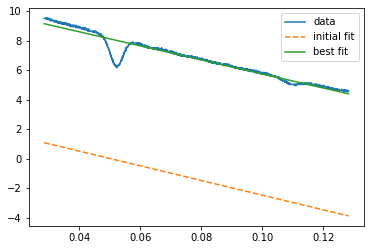

In [453]:
lin_fit = Lin_model.fit(df[4], x=df[3], a=a, b=b)

print(lin_fit.fit_report())


plt.plot(df[3], df[4], label='data')
plt.plot(df[3], lin_fit.init_fit, '--', label='initial fit')
plt.plot(df[3], lin_fit.best_fit, '-', label='best fit')
plt.legend()

[[Model]]
    ((Model(LinFunc) + Model(gaussian, prefix='A_')) + Model(gaussian, prefix='B_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 119
    # data points      = 2500
    # variables        = 8
    chi-square         = 14.9943439
    reduced chi-square = 0.00601699
    Akaike info crit   = -12774.9324
    Bayesian info crit = -12728.3400
    R-squared          = 0.99701683
[[Variables]]
    a:           -50.0561264 +/- 0.06148425 (0.12%) (init = -49.61985)
    b:            10.8159176 +/- 0.00506299 (0.05%) (init = 2.5)
    A_amplitude: -0.01010544 +/- 5.7456e-05 (0.57%) (init = -0.6)
    A_center:     0.05216883 +/- 1.2117e-05 (0.02%) (init = 0.05)
    A_sigma:      0.00206285 +/- 1.2607e-05 (0.61%) (init = 1.8227e-05)
    B_amplitude: -0.00169041 +/- 6.3597e-05 (3.76%) (init = -0.2)
    B_center:     0.10939061 +/- 8.6392e-05 (0.08%) (init = 0.11)
    B_sigma:      0.00231938 +/- 9.1389e-05 (3.94%) (init = 1.8227e-05)
    A_fwhm:       0.0048576

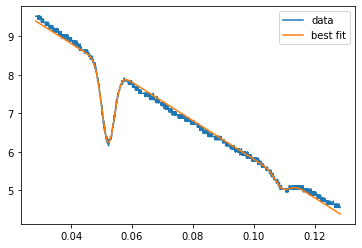

In [454]:
# params = tot_model.make_params(a=a, b=b, amp1=-1, cen1=0.062, wid1=0.005, amp2=-0.3, cen2=0.14, wid2=0.005)
result = tot_model.fit(df[4], x=df[3], a=a, b=b, A_amplitude=-0.6, A_center=0.05, A_sigma=1.8227e-05, B_amplitude=-0.2, B_center=0.11, B_sigma=1.8227e-05)



print(result.fit_report())

plt.plot(df[3], df[4], label='data')
#plt.plot(df[9], result.init_fit, '--', label='initial fit')
plt.plot(df[3], result.best_fit, '-', label='best fit')
plt.legend()

In [455]:
center_1=result.params.get("A_center").value
center_2=result.params.get("B_center").value
sigma_1=result.params.get("A_sigma").value
sigma_2=result.params.get("B_sigma").value

In [456]:
delta_t = result.params.get("B_center").value-result.params.get("A_center").value
delta_f = 6834.7e6

const = delta_f/delta_t

df["freq"]=const * df[3]

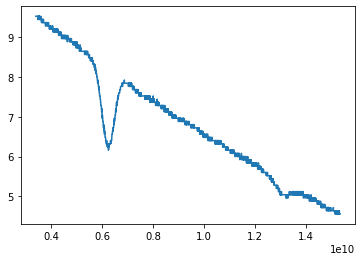

In [457]:
plt.plot(df["freq"], df[4])

In [458]:
c=-4.1908e-10
d=10

[[Model]]
    ((Model(LinFunc) + Model(gaussian, prefix='A_')) + Model(gaussian, prefix='B_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 199
    # data points      = 2500
    # variables        = 8
    chi-square         = 14.9943439
    reduced chi-square = 0.00601699
    Akaike info crit   = -12774.9324
    Bayesian info crit = -12728.3400
    R-squared          = 0.99701683
[[Variables]]
    a:           -4.1908e-10 +/- 5.1475e-13 (0.12%) (init = 1000)
    b:            10.8159166 +/- 0.00506293 (0.05%) (init = 10)
    A_amplitude: -1.2070e+09 +/- 6862696.72 (0.57%) (init = -2)
    A_center:     6.2312e+09 +/- 1447286.83 (0.02%) (init = 6.231163e+09)
    A_sigma:      2.4639e+08 +/- 1505754.69 (0.61%) (init = 2.463918e+08)
    B_amplitude: -2.0191e+08 +/- 7594847.01 (3.76%) (init = -2)
    B_center:     1.3066e+10 +/- 10316613.7 (0.08%) (init = 1.306586e+10)
    B_sigma:      2.7704e+08 +/- 10914090.2 (3.94%) (init = 2.770321e+08)
    A_fwhm:      

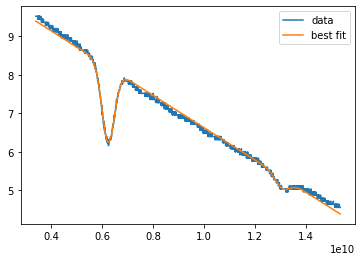

In [459]:
result_freq = tot_model.fit(df[4], x=df['freq'], a=1000, b=d, A_amplitude=-2, A_center=center_1*const, A_sigma=sigma_1*const, B_amplitude=-2, B_center=center_2*const, B_sigma=sigma_2*const)



print(result_freq.fit_report())

plt.plot(df['freq'], df[4], label='data')
#plt.plot(df['freq'], result_freq.init_fit, '--', label='initial fit')
plt.plot(df["freq"], result_freq.best_fit, '-', label='best fit')
plt.legend()

In [460]:
# proof of concept

k = 1.38e-23 # bolzmann constant
m = 86.909184 * 1.66053907e-27 # mass of rubidium
c = 3e8 # speed of light
f_0 = 384e12 # rest freq
sigma1=result_freq.params.get("A_sigma").value
sigma2=result_freq.params.get("B_sigma").value

T1 = (sigma1**2*m*c**2)/(k*f_0**2)
T2 = (sigma2**2*m*c**2)/(k*f_0**2)

print(T1)
print(T2)


387.4969352071695
489.90786539221466
